## In this notebook the concrete compressive strength is predicted on the basis of various factors.

## Importing the module

In [1]:
import pandas as pd
import numpy as np
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Loading the csv file


In [2]:
data = pd.read_excel("Concrete_Data.xls")

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Finding the correlation between the dependent variable and the independent variables

In [4]:
data.corr()["Concrete compressive strength(MPa, megapascals) "]

Cement (component 1)(kg in a m^3 mixture)                0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.134824
Fly Ash (component 3)(kg in a m^3 mixture)              -0.105753
Water  (component 4)(kg in a m^3 mixture)               -0.289613
Superplasticizer (component 5)(kg in a m^3 mixture)      0.366102
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.167249
Age (day)                                                0.328877
Concrete compressive strength(MPa, megapascals)          1.000000
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

## Importing the datas to a list

In [5]:
x=data.columns.tolist()
y="Concrete compressive strength(MPa, megapascals) "
print(x)

['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']


## Removing the independent variables from the list which do not have good correlation with the dependent variable. Also removing the dependent variable from the list so that it does not compare with itself.

In [6]:
x.remove("Fly Ash (component 3)(kg in a m^3 mixture)")
x.remove("Water  (component 4)(kg in a m^3 mixture)")
x.remove("Coarse Aggregate  (component 6)(kg in a m^3 mixture)")
x.remove("Fine Aggregate (component 7)(kg in a m^3 mixture)")
x.remove("Concrete compressive strength(MPa, megapascals) ")

In [7]:
print(x)

['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Age (day)']


## Importing the values of the independent variables and the dependent variable to the variables x1 and y1 respectively.

In [8]:
x1=data[x].values
y1=data[y].values

## Splitting the datas into training (80% of total datas) and testing (20% of total datas) sections.

In [9]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

## MinMaxScaler() function is used to transform the data in the range of 0 to 1 

In [10]:
scaler=MinMaxScaler()
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)

## Finding the linear regression

In [11]:
regression=LinearRegression()
regression.fit(x1_train,y1_train)

LinearRegression()

## Predicting the dependent variable (price) from the test section of the independent variables.

In [12]:
y1_prediction=regression.predict(x1_test)

## Finding the Root Mean Squared Error in predicted price. 

In [13]:
math.sqrt(mean_squared_error(y1_test,y1_prediction))

10.503647138022272

## Finding the R^2 value.

In [14]:
r2_score(y1_test,y1_prediction)

0.5811192779938398

## Plooting the graph between the predicted concrete compressive strength and the test section of the actual values of the concrete compressive strength.

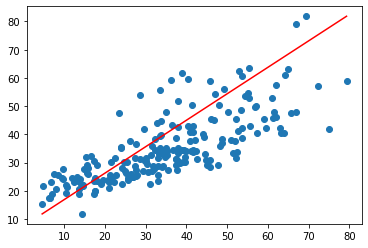

In [15]:
plt.scatter(y1_test,y1_prediction)
plt.plot([min(y1_test),max(y1_test)],[min(y1_prediction),max(y1_prediction)],color="red")

## First the correlation between the dependent variable and the independent variables are checked and the ones which have higher correlation are considered and others are droped. After predicting the dependent variables the R^2 value between the predicted values and the original values was found which appeared to be around 58%. So, finally it can be concluded that the concrete compressive strength can be predicted to some extent if we know the considered independent variables.

### Reference: 1. Notebooks provided by Prof. Dr. Christina B. Claß.